# Imports

In [1]:
import json

# Load the config from the JSON file

In [15]:
with open('../config.json', 'r') as config_file:
    config = json.load(config_file)

# Access the parameters from the config
project_id = config["project_id"]
mybucket = config["mybucket"]
environment = config["my-composer-environment"]
location = config["location"]
dataset_id = config['dataset_id']
service_account_path = config['service_account_path']

# Ingest Source Data into BigQuery

## Create Composer Environment

In [ ]:
!gcloud composer environments create {environment}\
    --location {location}

## Set environment variables for existing environments

In [7]:
!gcloud composer environments update \
  {environment} \
  --location {location} \
  --update-env-variables=dataset_id={dataset_id}

Waiting for [projects/dolu-sandbox-408209/locations/us-central1/environments/f1
-analysis] to be updated with [projects/dolu-sandbox-408209/locations/us-centra
l1/operations/5bae6716-52af-4479-8e38-7ffc0e91feba]...⠏                        

## Load SQL script to the composer environment

In [14]:
!gsutil -m cp -r ../sql/f1_analysis.sql gs://{mybucket}/sql/

If you experience problems with multiprocessing on MacOS, they might be related to https://bugs.python.org/issue33725. You can disable multiprocessing by editing your .boto config or by adding the following flag to your command: `-o "GSUtil:parallel_process_count=1"`. Note that multithreading is still available even if you disable multiprocessing.

Copying file://../sql/f1_analysis.sql [Content-Type=application/x-sql]...
/ [1/1 files][  1.8 KiB/  1.8 KiB] 100% Done                                    
Operation completed over 1 objects/1.8 KiB.                                      


## Load data to data folder in composer environment

In [ ]:
!gsutil -m cp -r ../data/* gs://{mybucket}/data/

## Load Config file to the composer environment

In [48]:
!gsutil -m cp ../config.json gs://{mybucket}/

If you experience problems with multiprocessing on MacOS, they might be related to https://bugs.python.org/issue33725. You can disable multiprocessing by editing your .boto config or by adding the following flag to your command: `-o "GSUtil:parallel_process_count=1"`. Note that multithreading is still available even if you disable multiprocessing.

Copying file://../config.json [Content-Type=application/json]...
- [1/1 files][  109.0 B/  109.0 B] 100% Done                                    
Operation completed over 1 objects/109.0 B.                                      


## Load python file into DAG folder in composer environment

In [12]:
# upload your DAG file to the /dags directory of your environment's bucket
!gsutil cp ../dags/f1_analysis.py gs://{mybucket}/dags

Copying file://../dags/f1_analysis.py [Content-Type=text/x-python]...
/ [1 files][  2.2 KiB/  2.2 KiB]                                                
Operation completed over 1 objects/2.2 KiB.                                      


# Clean up

## Delete the BigQuery Dataset

In [ ]:
!bq rm -r -f -d {project_id}:{dataset_id}

## Delete Data from Cloud Storage

In [ ]:
!gsutil rm -r gs://{mybucket}

## Delete the Cloud Composer Environment

In [ ]:
!gcloud composer environments delete {environment} \
    --location {location}

### circuits table
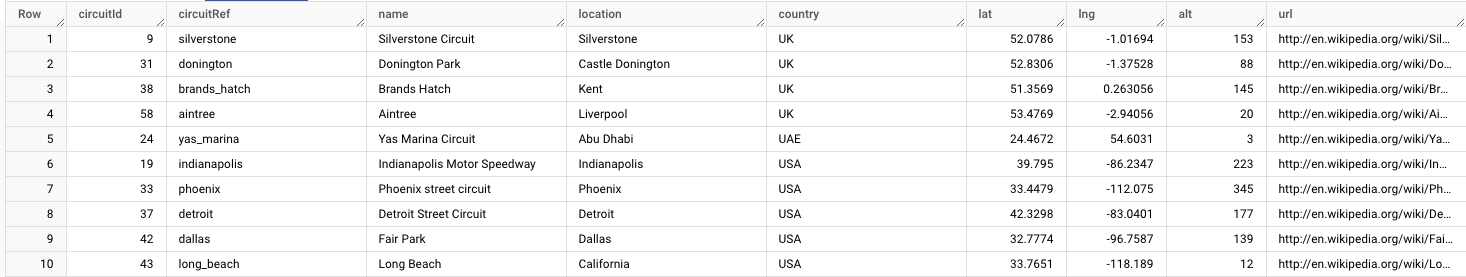

### constructors table
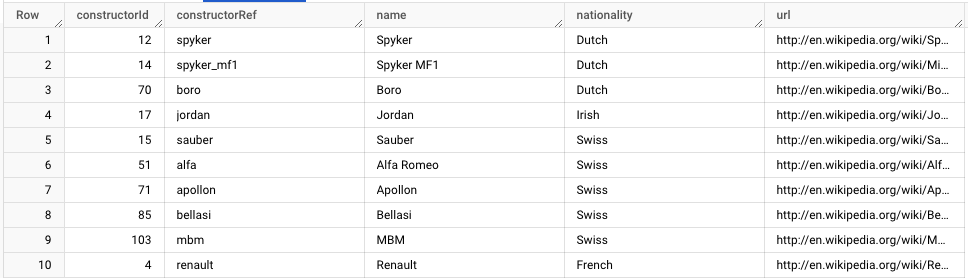

### ddrivers table
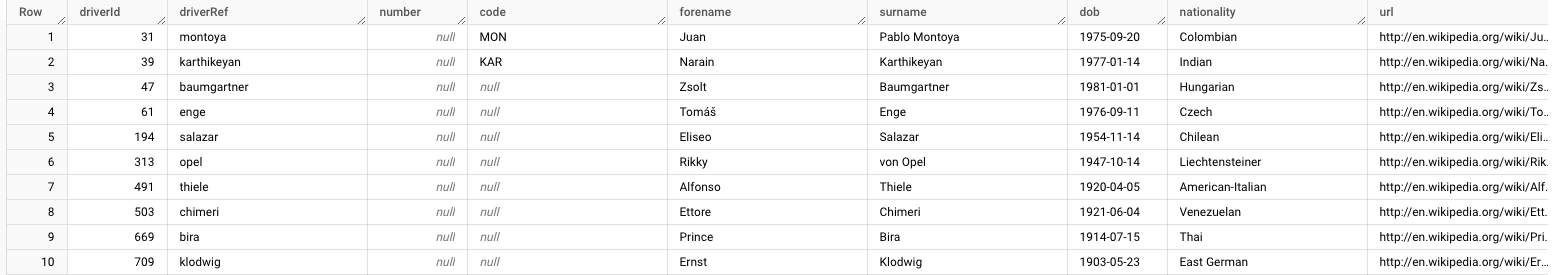

### races table
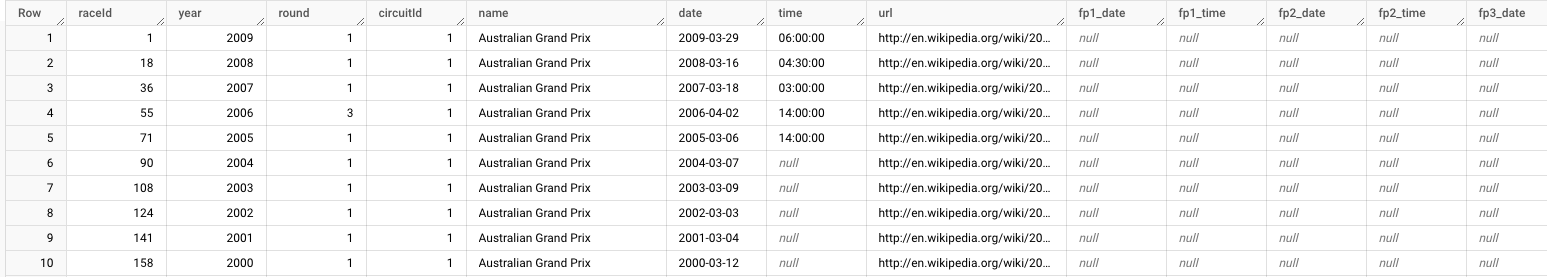

### results table
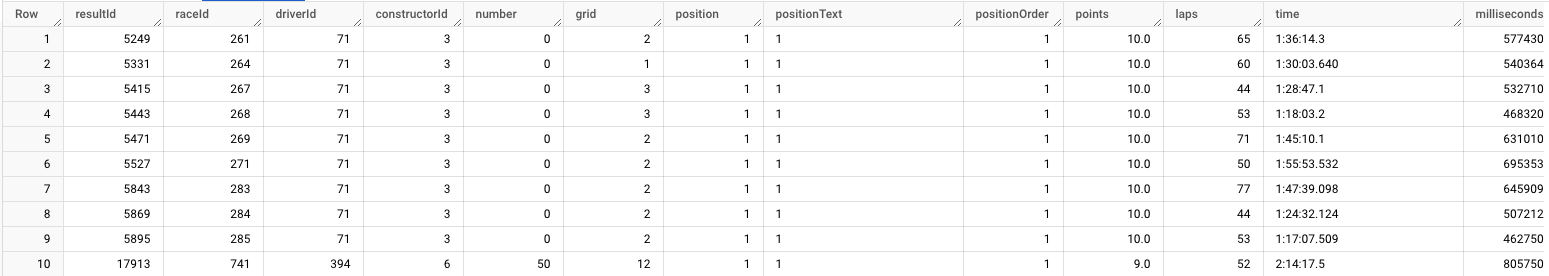

### f1_result table
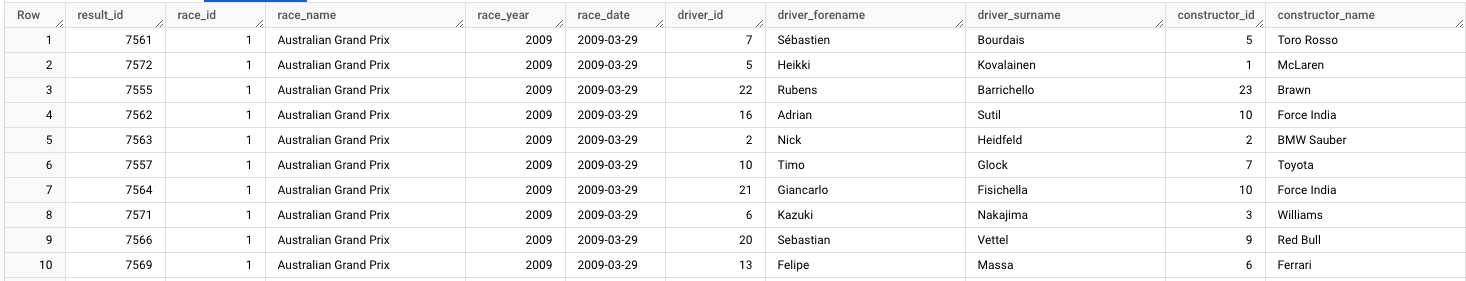